# Numerical Integration - Coding Activities
## CH EN 2450 - Numerical Methods
**Prof. Tony Saad (<a>www.tsaad.net</a>) <br/>Department of Chemical Engineering <br/>University of Utah**
<hr/>

In [10]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from scipy import integrate

# Activity 1
Develop three Python routines that implement the left-point, right-point, and mid-point formulas. The routine arguments must include: (1) a function, and (2) the interval (a,b) on which the function is to be evaluated. Then apply these functions to calculate ￼$\int_0^1 {[1 + 0.5 \sin^2(1.75\pi x)]\text{d}x}$

Define the function $f(x) = 1 + 0.5\sin^2(1.75\pi x)$

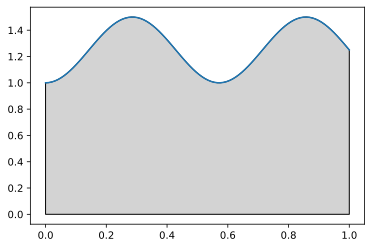

In [11]:
def myf(x):
    return 1 + 0.5*np.sin(1.75*np.pi*x)**2
x = np.linspace(0,1,100)
plt.plot(x,myf(x))
ax = plt.gca()
ax.fill_between(x,myf(x),edgecolor='k', facecolor='lightgray',linewidth=1)
# plt.ylim(0,2)

In [12]:
def leftrule(f,a,b):
    return (b-a)*f(a)
def rightrule(f,a,b):
    return (b-a)*f(b)
def midpointrule(f,a,b):
    return (b-a)*f((a+b)/2)

In [13]:
print(leftrule(myf,0,1))
print(rightrule(myf,0,1))
print(midpointrule(myf,0,1))

1.0
1.25
1.0732233047033632


In [16]:
print(integrate.quad(myf, 0, 1)[0])

1.2727364204416993


# Activity 2
Develop a Python code that computes the integral for an analytical function with arbitrary number of points intervals n. Use the left point, right point, and midpoint rules

In [39]:
def leftrule(f,a,b,n):
    '''
    Computes the integral of f(x) using the left-point rule.     
    f: Any Python function
    a: Lower integral bound
    b: Upper integral bound
    n: Number of quadrature segments
    
    Returns the integral of f(x) based on the midpoint rule
    '''    
    x = np.linspace(a, b, n) # how many points do we need for n segments?
    result = 0.0
    # now loop over the segments
    for i in range(n-1):
        a = x[i]
        b = x[i+1]
        result += (b-a)*f(a)
    return result

def rightrule(f,a,b,n):
    '''
    Computes the integral of f(x) using the right-point rule.     
    f: Any Python function
    a: Lower integral bound
    b: Upper integral bound
    n: Number of quadrature segments
    
    Returns the integral of f(x) based on the midpoint rule
    '''        
    x = np.linspace(a, b, n) # how many points do we need for n segments?
    result = 0.0
    # now loop over the segments
    for i in range(n-1):
        a = x[i]
        b = x[i+1]
        result += (b-a)*f(b)
    return result

def midpointrule(f,a,b,n):
    '''
    Computes the integral of f(x) using the mid-point rule.     
    f: Any Python function
    a: Lower integral bound
    b: Upper integral bound
    n: Number of quadrature segments
    
    Returns the integral of f(x) based on the midpoint rule
    '''        
    x = np.linspace(a, b, n) # how many points do we need for n segments?
    result = 0.0
    # now loop over the segments
    for i in range(n-1):
        a = x[i]
        b = x[i+1]
        result += (b-a)*f((a+b)/2)
    return result

In [6]:
leftrule(myf,0,1,200)

1.2721024948812

In [7]:
rightrule(myf,0,1,200)

1.2733587762882348

In [8]:
midpointrule(myf,0,1,200)

1.2727393129805784

# Activity 3
Using the left-point or right-point rule, develop a Python code that integrates discrete data. Apply it to calculate the world emissions of CO2 per capita.

Text(0, 0.5, 'Metric tons of CO2 per capita, Worldwide')

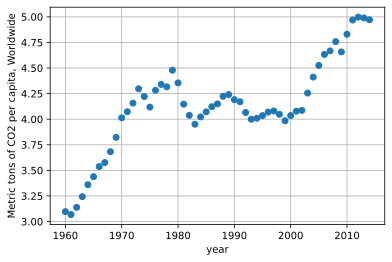

In [21]:
data = np.loadtxt('CO2 World Emissions.txt',delimiter=' ')
xi = data[:,0]
yi = data[:,1]
plt.plot(xi,yi,'o')
plt.grid()
plt.xlabel('year')
plt.ylabel('Metric tons of CO2 per capita, Worldwide')

In [32]:
def leftrule2(x,y):
    result = 0.0
    n = len(x)
    # loop over the data points
    for i in range(n-1):
        a = x[i]
        b = x[i+1]
        fa = y[i]
        result += (b-a) * fa
    return result

def rightrule2(x,y):
    result = 0.0
    n = len(x)
    for i in range(n-1):
        a = x[i]
        b = x[i+1]
        fb = y[i+1]
        result += (b-a) * fb
    return result

In [33]:
leftrule2(xi,yi)

222.12938429900004

In [34]:
rightrule2(xi,yi)

224.00401875199998

# Activity 4
Develop a Python routine that computes the integral of a function using the Trapezoidal rule for an arbitrary number of intervals n, and use it to calculate $\int_0^1 {[1 + 0.5 \sin^2(1.75\pi x)]\text{d}x}$ ￼ 

In [35]:
def traprulef(f, a, b, n):
    '''
    Computes the integral of f(x) using the Trapezoidal rule. 
    
    f: Any Python function
    a: Lower integral bound
    b: Upper integral bound
    npts: Number of quadrature segments
    
    Returns the integral of f(x) based on the midpoint rule
    '''    
    x = np.linspace(a, b, n)
    sum = 0.0
    for i in range(n-1):
        a = x[i]
        b = x[i+1]
        sum += 0.5*(b-a)*(f(a) + f(b))
    return sum

In [41]:
a = 1
b = 2.3
exact = integrate.quad(myf,a,b)[0]
print(traprulef(myf,a,b,n))
print(exact)

1.5987181259620744
1.5987068197895733


In [37]:
n = 200
v1 = traprulef(myf,a,b,n)
e1 = abs(v1 - exact)/exact
v2 = traprulef(myf,a,b,2*n)
e2 = abs(v2 - exact)/exact
print(e1/e2)

4.0203854969353925


In [40]:
n = 200
v1 = midpointrule(myf,a,b,n)
e1 = abs(v1 - exact)
v2 = midpointrule(myf,a,b,2*n)
e2 = abs(v2 - exact)
print(e1/e2)

4.020580307776729


# Activity 5
Using the Trapezoidal rule, develop a Python routine that computes the integral of discrete data (xi,yi). Test your routine on the World Emissions of CO2.

In [44]:
def traprule(x,y):
    '''
    Integrates a discrete set of data using the Trapezoidal rule.
    
    x: Values of the independent variable
    y: Values of the dependent variable
    
    Returns the integral of f(x) based on the midpoint rule
    '''
    sum = 0.0
    n = len(x)
    for i in range(n-1):
        a = x[i]
        b = x[i+1]
        fa = y[i]
        fb = y[i+1]
        sum += 0.5*(b-a)*(fa + fb)
    return sum

In [45]:
traprule(xi,yi)

223.06670152549995